In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,precision_score,f1_score

In [5]:
marz=pd.read_csv('/Churn_Modelling.csv',header=0)

In [6]:
marz.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
marz.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
marz.shape

(10000, 14)

In [9]:
marz.size

140000

In [10]:
marz.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
marz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
marz.isnull().values.any()

False

In [13]:
marz.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [14]:
marz.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
marz.index

RangeIndex(start=0, stop=10000, step=1)

In [16]:
print(marz["Geography"].unique())
print(marz["Gender"].unique())
print(marz["Age"].unique())
print(marz["Exited"].unique())
print(marz["HasCrCard"].unique())
print(marz["NumOfProducts"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
[1 0]
[1 0]
[1 3 2 4]


In [17]:
marz.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [18]:
marz.iloc[0:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
marz.loc[:,"CustomerId"]

,CustomerId
0,15634602
1,15647311
2,15619304
3,15701354
4,15737888
...,...
9995,15606229
9996,15569892
9997,15584532
9998,15682355


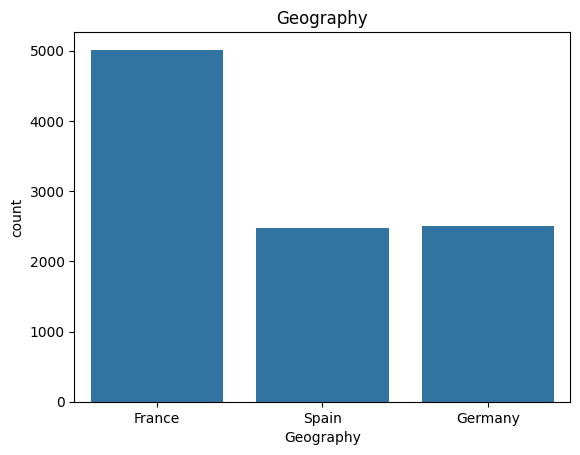

In [20]:
sns.countplot(x="Geography",data=marz)
plt.title("Geography")
plt.show()

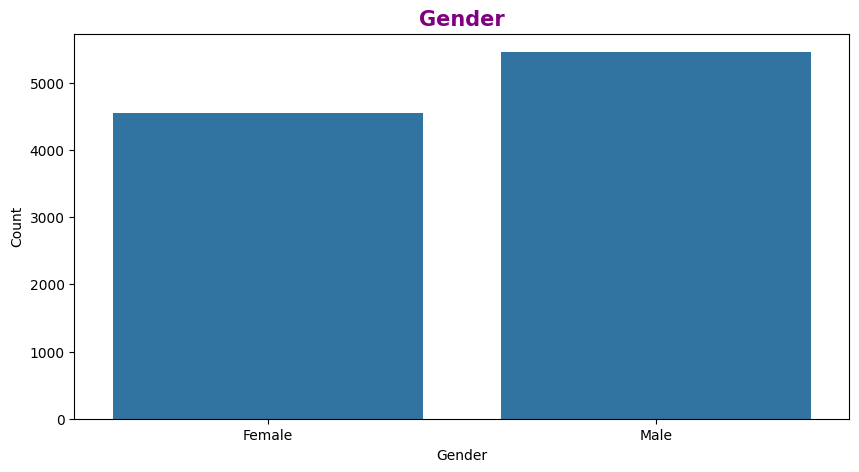

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender",data=marz)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender",fontsize=15,fontweight="bold",color="purple")
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

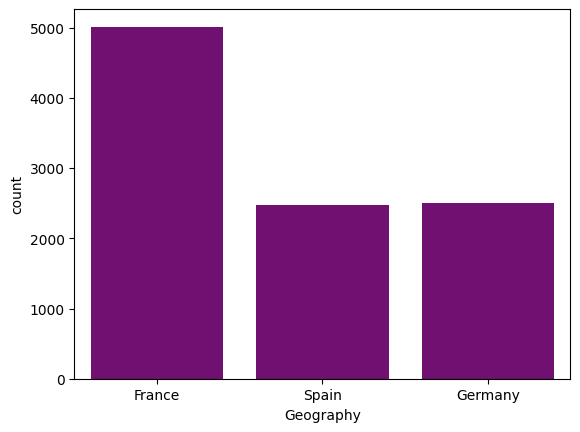

In [22]:
sns.countplot(x="Geography",data=marz,color="purple")


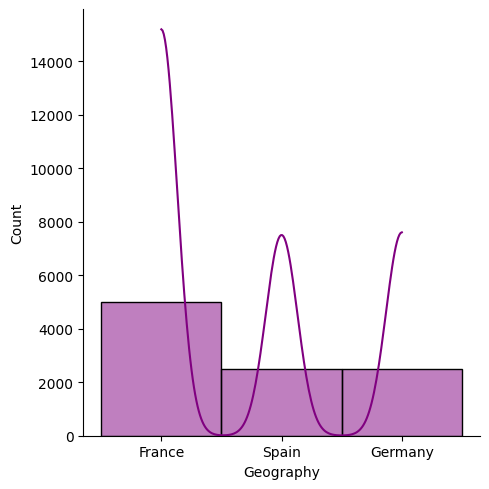

In [23]:
import seaborn as sns
sns.displot(marz.Geography,kde=True,color="purple")

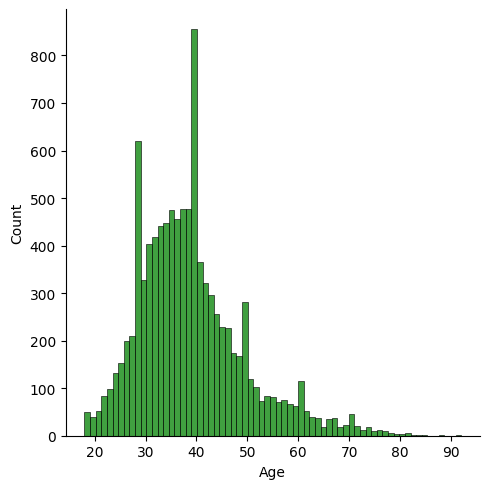

In [24]:
sns.displot(marz.Age,color="Green")

<ipython-input-25-8c2ceecced89>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count1.index,y=count1.values,palette="rocket")


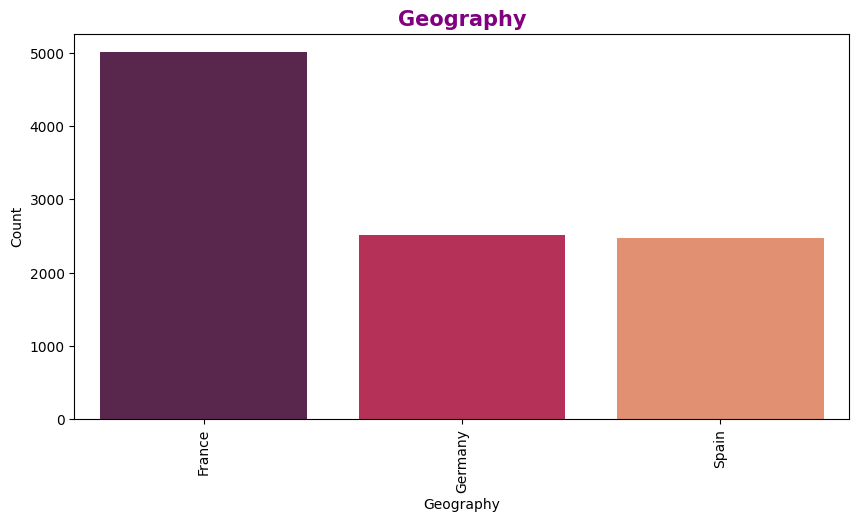

In [25]:
plt.figure(figsize=(10,5))
count1=marz.Geography.value_counts()
sns.barplot(x=count1.index,y=count1.values,palette="rocket")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Geography",fontsize=15,fontweight="bold",color="purple")
plt.xticks(rotation=90)
plt.show()

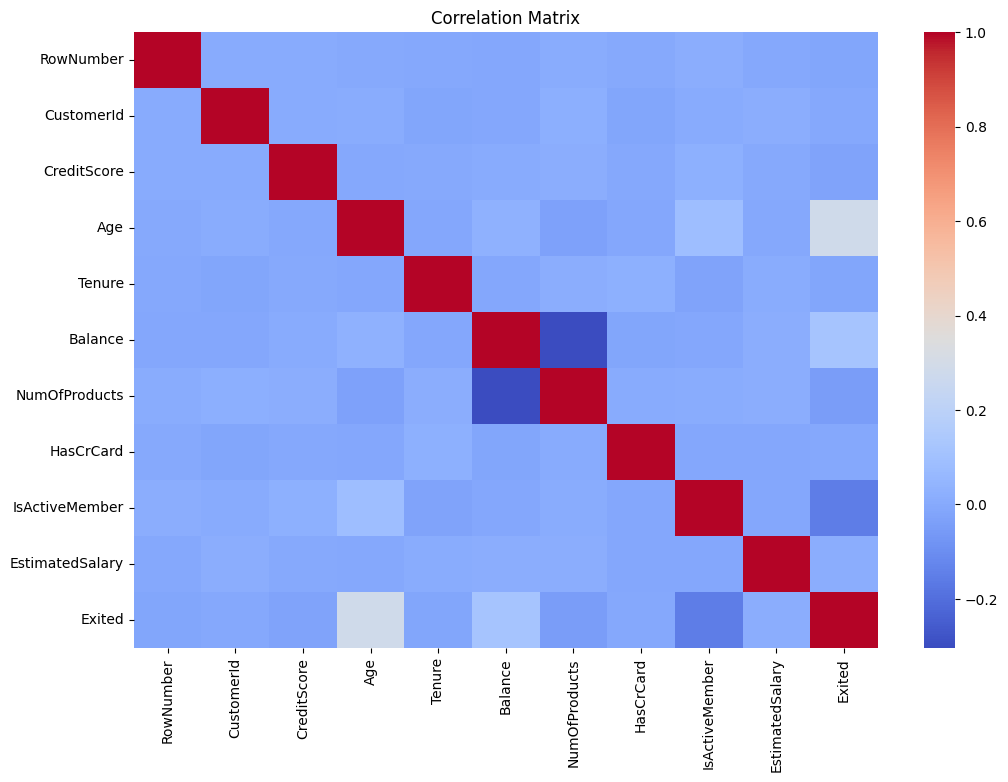

In [26]:
correlation_matrix = marz.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=False,fmt=",2f")
plt.title("Correlation Matrix")
plt.show()

In [27]:
marz.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
marz.drop(labels=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [29]:
marz=pd.get_dummies(marz,drop_first=True)

In [30]:
marz.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [31]:
x=marz.drop(labels="Exited",axis=1)
y=marz["Exited"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [34]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [35]:
lr_predictions=lr_model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [37]:
print("Logistic Regression Model")
print("Mean Squared Error:",mean_squared_error(y_test,lr_predictions))
print("Mean Absolute Error:",mean_absolute_error(y_test,lr_predictions))
print("R2 Score:",r2_score(y_test,lr_predictions))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,lr_predictions)))

Logistic Regression Model
Mean Squared Error: 0.13304966316672986
Mean Absolute Error: 0.2825540491365921
R2 Score: 0.15131502844863542
Root Mean Squared Error: 0.3647597334777098


In [38]:
rf_model=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [39]:
rf_predictions=rf_model.predict(x_test)

In [40]:
print("Random Forest Model")
print("Accuracy Score:",accuracy_score(y_test,rf_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,rf_predictions))
print("Classification Report:\n",classification_report(y_test,rf_predictions))
print("Precision Score:",precision_score(y_test,rf_predictions))
print("F1 Score:",f1_score(y_test,rf_predictions))

Random Forest Model
Accuracy Score: 0.8676666666666667
Confusion Matrix:
 [[2330   86]
 [ 311  273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000

Precision Score: 0.7604456824512534
F1 Score: 0.5790031813361611


In [41]:
gb_model=GradientBoostingClassifier(n_estimators=1000,random_state=42)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [42]:
gb_predictions=gb_model.predict(x_test)

In [43]:
print("Gradient Boosting Model")
print("Accuracy Score:",accuracy_score(y_test,gb_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,gb_predictions))
print("Classification Report:\n",classification_report(y_test,gb_predictions))
print("Precision Score:",precision_score(y_test,gb_predictions))
print("F1 Score:",f1_score(y_test,gb_predictions))
print("R2 Score:",r2_score(y_test,gb_predictions))

Gradient Boosting Model
Accuracy Score: 0.8673333333333333
Confusion Matrix:
 [[2300  116]
 [ 282  302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.52      0.60       584

    accuracy                           0.87      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

Precision Score: 0.722488038277512
F1 Score: 0.6027944111776445
R2 Score: 0.15375805134718334
